In [207]:
import os
import re
from pathlib import Path

import pandas as pd
import scanpy as sc

In [2]:
def listfiles(folder, regex=None):
    """Return all files with the given regex in the given folder structure"""
    for root, folders, files in os.walk(folder):
        for filename in folders + files:
            if regex is None:
                yield os.path.join(root, filename)
            elif re.findall(regex, os.path.join(root, filename)):
                yield os.path.join(root, filename)

In [3]:
figdir = '../results/figures/single_cell_analysis'
Path(figdir).mkdir(parents=True, exist_ok=True)
sc.settings.figdir = figdir

In [4]:
sample_cellranger_tups = [(fp, os.path.join('../data/pdac/', fp))
                          for fp in sorted(os.listdir('../data/pdac/'))
                          if '.' not in fp]
sample_cellranger_tups

[('1555-tumor', '../data/pdac/1555-tumor'),
 ('H_ZY-1105-07', '../data/pdac/H_ZY-1105-07'),
 ('H_ZY-1160-06', '../data/pdac/H_ZY-1160-06'),
 ('H_ZY-1174-06', '../data/pdac/H_ZY-1174-06'),
 ('H_ZY-1305-06', '../data/pdac/H_ZY-1305-06'),
 ('TWCE-HT055P-S1PAG', '../data/pdac/TWCE-HT055P-S1PAG'),
 ('TWCE-HT081P1-XB1', '../data/pdac/TWCE-HT081P1-XB1'),
 ('wu01', '../data/pdac/wu01'),
 ('wu02', '../data/pdac/wu02'),
 ('wu03', '../data/pdac/wu03'),
 ('wu04', '../data/pdac/wu04'),
 ('wu05', '../data/pdac/wu05'),
 ('wu07', '../data/pdac/wu07'),
 ('wu09', '../data/pdac/wu09'),
 ('wu14', '../data/pdac/wu14'),
 ('wu15', '../data/pdac/wu15'),
 ('wu16', '../data/pdac/wu16'),
 ('wu18', '../data/pdac/wu18'),
 ('wu22', '../data/pdac/wu22'),
 ('wu23', '../data/pdac/wu23'),
 ('wu24', '../data/pdac/wu24')]

In [48]:
adatas = []
for sample, fp in sample_cellranger_tups:
    print(sample)
    adata = sc.read_10x_mtx(fp, var_names='gene_symbols', cache=True)
    adata.obs['sample_id'] = sample
    print(adata.shape)
    adatas.append(adata)
len(adatas)

1555-tumor
(737280, 33538)
H_ZY-1105-07
(737280, 33694)
H_ZY-1160-06
(737280, 33694)
H_ZY-1174-06
(737280, 33694)
H_ZY-1305-06
(737280, 33694)
TWCE-HT055P-S1PAG
(737280, 33538)
TWCE-HT081P1-XB1
(6794880, 33538)
wu01
(737280, 33538)
wu02
(737280, 33538)
wu03
(737280, 33538)
wu04
(737280, 33538)
wu05
(737280, 33538)
wu07
(737280, 33538)
wu09
(737280, 33538)
wu14
(737280, 33538)
wu15
(737280, 33538)
wu16
(737280, 33538)
wu18
(737280, 33538)
wu22
(1725, 33538)
wu23
(742, 33538)
wu24
(421, 33538)


21

In [49]:
adatas[0].obs

sample_id
AAACCTGAGAAACCAT-1  1555-tumor
AAACCTGAGAAACCGC-1  1555-tumor
AAACCTGAGAAACCTA-1  1555-tumor
AAACCTGAGAAACGAG-1  1555-tumor
AAACCTGAGAAACGCC-1  1555-tumor
...                        ...
TTTGTCATCTTTACAC-1  1555-tumor
TTTGTCATCTTTACGT-1  1555-tumor
TTTGTCATCTTTAGGG-1  1555-tumor
TTTGTCATCTTTAGTC-1  1555-tumor
TTTGTCATCTTTCCTC-1  1555-tumor

[737280 rows x 1 columns]

In [50]:
adata = adatas[0].concatenate(*adatas[1:])
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 19331528 × 22164
    obs: 'sample_id', 'batch'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9'

In [51]:
adata.obs

sample_id batch
AAACCTGAGAAACCAT-1-0   1555-tumor     0
AAACCTGAGAAACCGC-1-0   1555-tumor     0
AAACCTGAGAAACCTA-1-0   1555-tumor     0
AAACCTGAGAAACGAG-1-0   1555-tumor     0
AAACCTGAGAAACGCC-1-0   1555-tumor     0
...                           ...   ...
TTTCCTCGTACAGTGG-1-20        wu24    20
TTTCCTCGTGTGACGA-1-20        wu24    20
TTTGGTTAGAACTGTA-1-20        wu24    20
TTTGGTTAGATGTGGC-1-20        wu24    20
TTTGTCAGTTCCACGG-1-20        wu24    20

[19331528 rows x 2 columns]

In [9]:
import anndata
anndata.__version__

'0.7.5'

In [10]:
# !pip install anndata==0.7.5

In [52]:
adata.write_h5ad('../data/pdac/m1.h5ad')

... storing 'sample_id' as categorical
... storing 'feature_types-0' as categorical
... storing 'feature_types-10' as categorical
... storing 'feature_types-11' as categorical
... storing 'feature_types-12' as categorical
... storing 'feature_types-13' as categorical
... storing 'feature_types-14' as categorical
... storing 'feature_types-15' as categorical
... storing 'feature_types-16' as categorical
... storing 'feature_types-17' as categorical
... storing 'feature_types-18' as categorical
... storing 'feature_types-19' as categorical
... storing 'feature_types-20' as categorical
... storing 'feature_types-7' as categorical
... storing 'feature_types-8' as categorical
... storing 'feature_types-9' as categorical


In [53]:
adata_all = sc.read_h5ad('../data/pdac/m1.h5ad')

In [54]:
adata_all.obs

sample_id batch
AAACCTGAGAAACCAT-1-0   1555-tumor     0
AAACCTGAGAAACCGC-1-0   1555-tumor     0
AAACCTGAGAAACCTA-1-0   1555-tumor     0
AAACCTGAGAAACGAG-1-0   1555-tumor     0
AAACCTGAGAAACGCC-1-0   1555-tumor     0
...                           ...   ...
TTTCCTCGTACAGTGG-1-20        wu24    20
TTTCCTCGTGTGACGA-1-20        wu24    20
TTTGGTTAGAACTGTA-1-20        wu24    20
TTTGGTTAGATGTGGC-1-20        wu24    20
TTTGTCAGTTCCACGG-1-20        wu24    20

[19331528 rows x 2 columns]

In [55]:
sorted(set(adata_all.obs['sample_id']))

['1555-tumor',
 'H_ZY-1105-07',
 'H_ZY-1160-06',
 'H_ZY-1174-06',
 'H_ZY-1305-06',
 'TWCE-HT055P-S1PAG',
 'TWCE-HT081P1-XB1',
 'wu01',
 'wu02',
 'wu03',
 'wu04',
 'wu05',
 'wu07',
 'wu09',
 'wu14',
 'wu15',
 'wu16',
 'wu18',
 'wu22',
 'wu23',
 'wu24']

## all together

In [56]:
exclude = ['H_ZY-1305-06']
mask = [True if s not in exclude else False for s in adata_all.obs['sample_id']]
adata = adata_all[mask]
adata

View of AnnData object with n_obs × n_vars = 18594248 × 22164
    obs: 'sample_id', 'batch'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9'

In [57]:
set(adata.obs['sample_id'])

{'1555-tumor',
 'H_ZY-1105-07',
 'H_ZY-1160-06',
 'H_ZY-1174-06',
 'TWCE-HT055P-S1PAG',
 'TWCE-HT081P1-XB1',
 'wu01',
 'wu02',
 'wu03',
 'wu04',
 'wu05',
 'wu07',
 'wu09',
 'wu14',
 'wu15',
 'wu16',
 'wu18',
 'wu22',
 'wu23',
 'wu24'}

In [58]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

Trying to set attribute `.obs` of view, copying.


In [59]:
adata

AnnData object with n_obs × n_vars = 51354 × 19346
    obs: 'sample_id', 'batch', 'n_genes'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9', 'n_cells'

In [60]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

/diskmnt/Projects/Users/estorrs/miniconda3/envs/sc_pdac_v2/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/diskmnt/Projects/Users/estorrs/miniconda3/envs/sc_pdac_v2/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/diskmnt/Projects/Users/estorrs/miniconda3/envs/sc_pdac_v2/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/diskmnt/Projects/Users/estorrs/miniconda3/envs/sc_pdac_v2/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/diskmnt/Projects/Users/estorrs/miniconda3/envs/sc_p

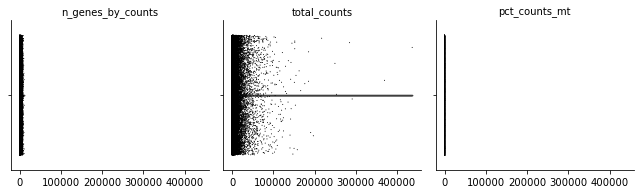

In [61]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [62]:
adata.obs['type'] = ['EUS-FNB' if 'wu' == x[:2].lower() else 'Surgical' for x in adata.obs['sample_id']]
adata.obs

sample_id batch  n_genes  n_genes_by_counts  \
AAACCTGAGACCTAGG-1-0   1555-tumor     0     1123               1123   
AAACCTGAGTGCGTGA-1-0   1555-tumor     0     4134               4133   
AAACCTGCAATCGGTT-1-0   1555-tumor     0      537                537   
AAACCTGCACCGTTGG-1-0   1555-tumor     0     1682               1682   
AAACCTGCATCCCACT-1-0   1555-tumor     0      329                329   
...                           ...   ...      ...                ...   
TTTCCTCGTACAGTGG-1-20        wu24    20     1356               1356   
TTTCCTCGTGTGACGA-1-20        wu24    20     2017               2017   
TTTGGTTAGAACTGTA-1-20        wu24    20     2695               2695   
TTTGGTTAGATGTGGC-1-20        wu24    20      820                820   
TTTGTCAGTTCCACGG-1-20        wu24    20     2609               2609   

                       total_counts  total_counts_mt  pct_counts_mt      type  
AAACCTGAGACCTAGG-1-0         2868.0            171.0       5.962343  Surgical  
AAACCTGAGTGCGTGA-1-0        20751.0           1307.0       6.298491  Surgical  
AAACCTGCAATCGGTT-1-0         3919.0           3222.0      82.214851  Surgical  
AAACCTGCACCGTTGG-1-0         6477.0           3926.0      60.614483  Surgical  
AAACCTGCATCCCACT-1-0          501.0             24.0       4.790420  Surgical  
...                             ...              ...            ...       ...  
TTTCCTCGTACAGTGG-1-20        3958.0              4.0       0.101061   EUS-FNB  
TTTCCTCGTGTGACGA-1-20        3937.0            372.0       9.448819   EUS-FNB  
TTTGGTTAGAACTGTA-1-20        6658.0            324.0       4.866326   EUS-FNB  
TTTGGTTAGATGTGGC-1-20        1299.0            114.0       8.775982   EUS-FNB  
TTTGTCAGTTCCACGG-1-20        6173.0            280.0       4.535882   EUS-FNB  

[51354 rows x 8 columns]

... storing 'type' as categorical


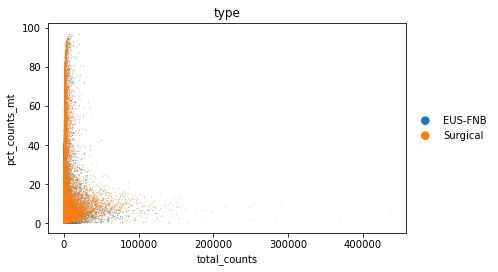

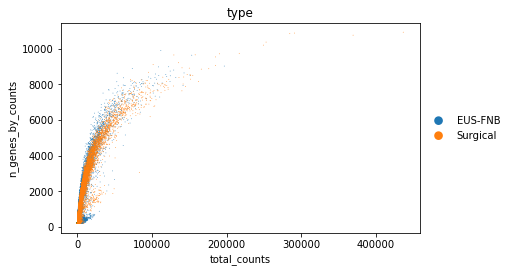

In [63]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color='type')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color='type')

In [64]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]

In [65]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

/diskmnt/Projects/Users/estorrs/miniconda3/envs/sc_pdac_v2/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [66]:
sc.pp.highly_variable_genes(adata, n_top_genes=3000)

In [67]:
adata.raw = adata

In [68]:
adata = adata[:, adata.var.highly_variable]

In [69]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [70]:
sc.pp.scale(adata, max_value=None)

In [71]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=40)
sc.tl.umap(adata)

In [72]:
sc.tl.leiden(adata, resolution=1.5)

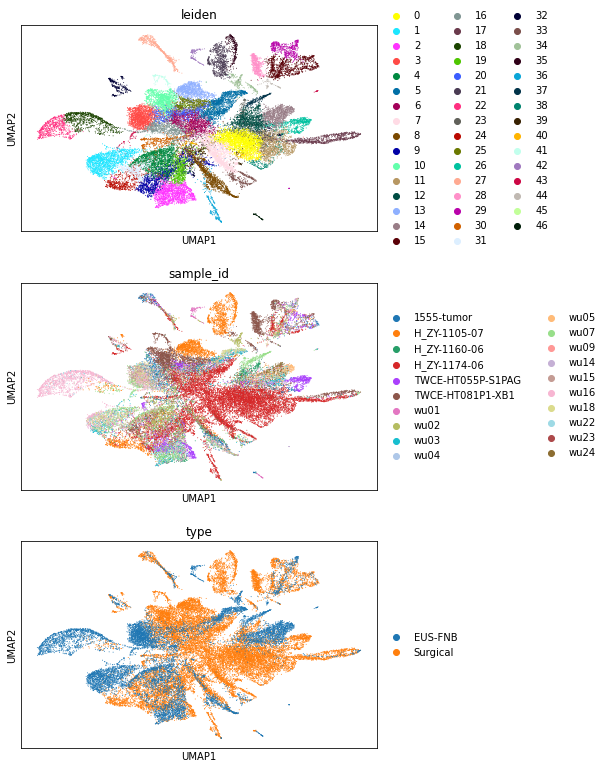

In [73]:
sc.pl.umap(adata, color=['leiden', 'sample_id', 'type'], ncols=1)

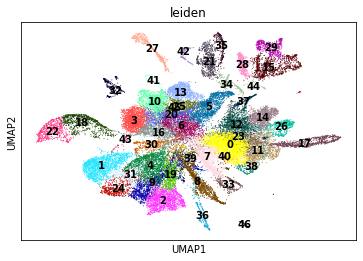

In [74]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [75]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')

In [76]:
cell_type_to_cluster = {}

###### acinar

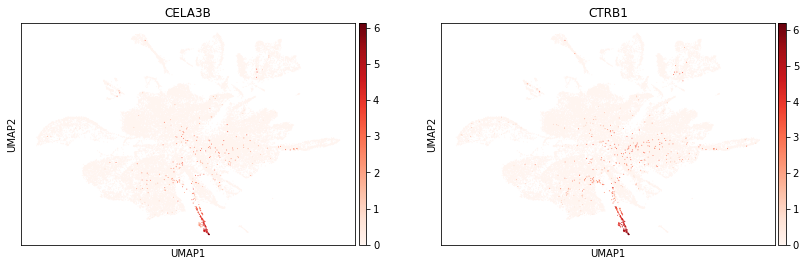

In [77]:
markers = ['CELA3B', 'CTRB1']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_acinar_combined.pdf')

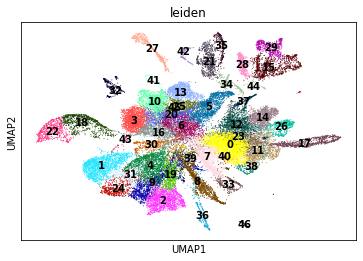

In [78]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [79]:
cell_type_to_cluster['acinar'] = [36]

###### fibroblast

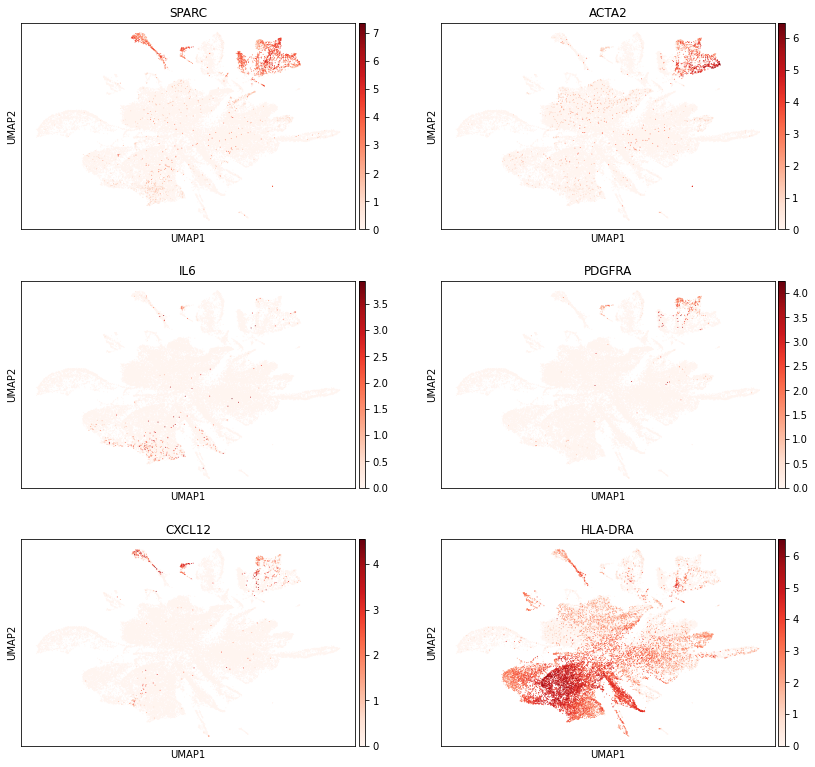

In [80]:
markers = ['SPARC', 'ACTA2', 'IL6', 'PDGFRA', 'CXCL12', 'HLA-DRA']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_caf_surgical.pdf')

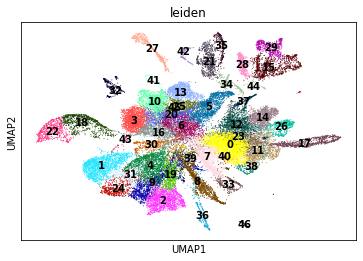

In [81]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [82]:
cell_type_to_cluster['CAF'] = [29, 28, 15]
# cell_type_to_cluster['apCAF'] = [21]

###### monocytes/macrophages

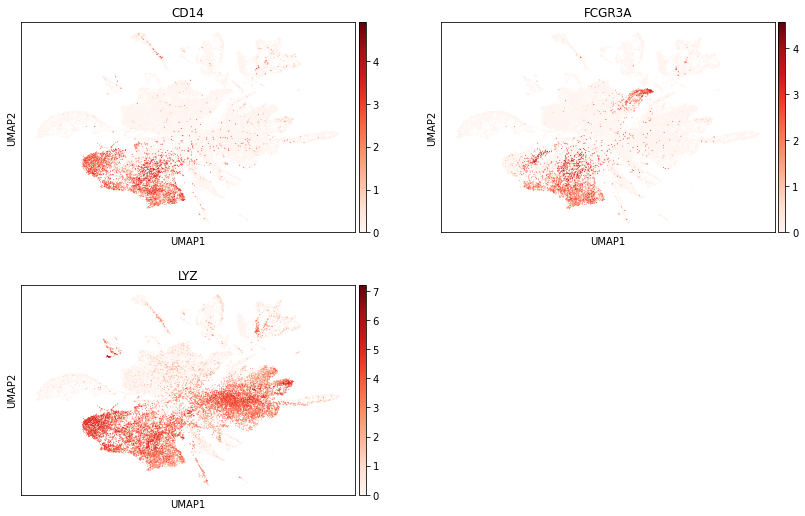

In [83]:
markers = ['CD14', 'FCGR3A', 'LYZ']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds')

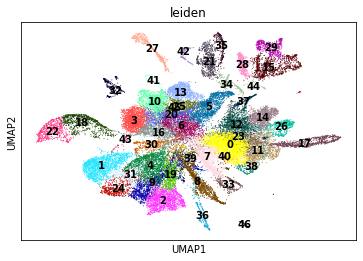

In [84]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [145]:
cell_type_to_cluster['monocyte_1'] = [1]
cell_type_to_cluster['monocyte_2'] = [24, 31, 4, 19, 2, 9, 30, 43]

###### B cell

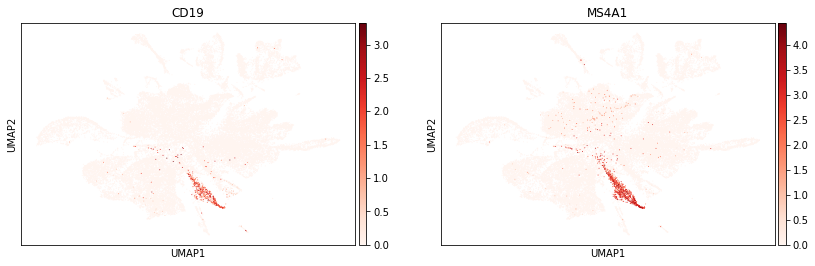

In [86]:
markers = ['CD19', 'MS4A1']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds')

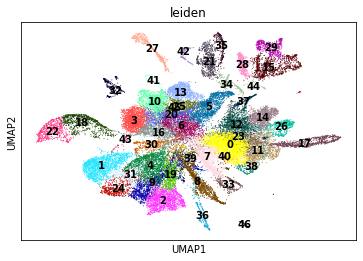

In [87]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [135]:
cell_type_to_cluster['b_cell'] = [8, 39]

###### t/nk

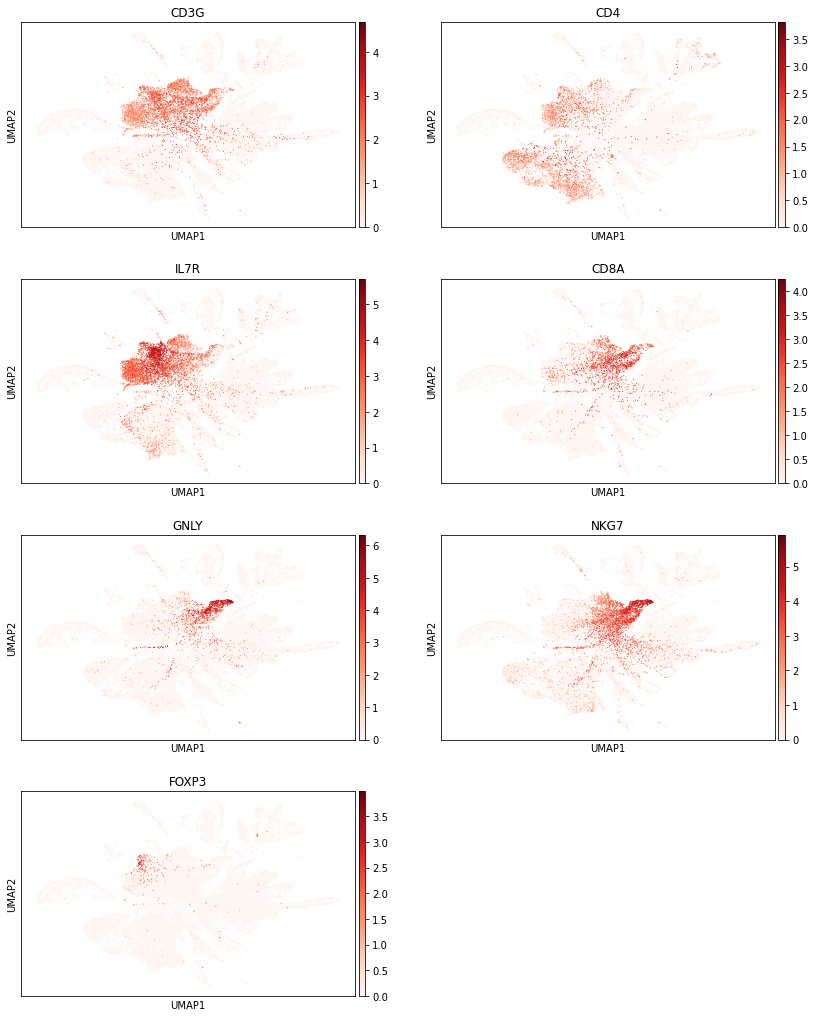

In [89]:
markers = ['CD3G', 'CD4', 'IL7R', 'CD8A', 'GNLY', 'NKG7', 'FOXP3']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds')

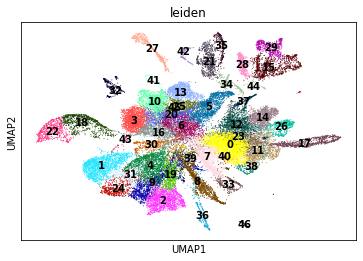

In [90]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [151]:
cell_type_to_cluster['cd4_t_cell'] = [3, 10, 16]
cell_type_to_cluster['cd8_t_cell'] = [13, 6, 20, 25, 45]
cell_type_to_cluster['nk'] = [5]

###### DC

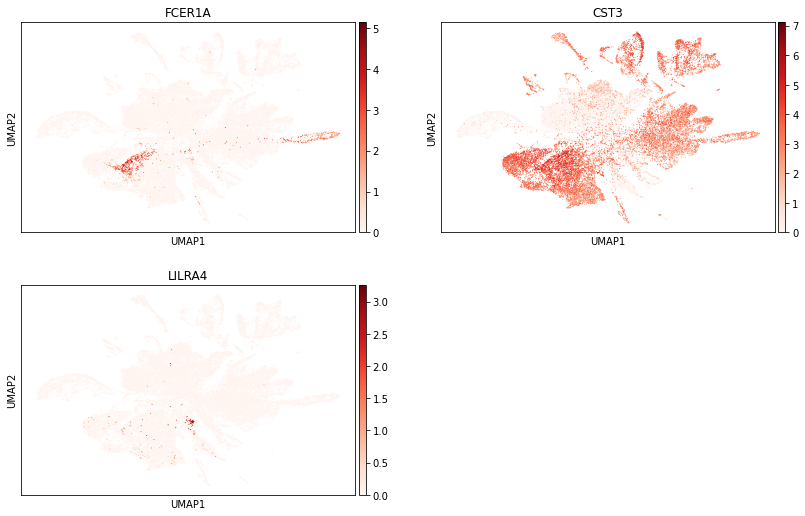

In [92]:
markers = ['FCER1A', 'CST3', 'LILRA4']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds')

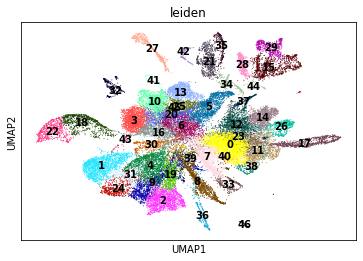

In [93]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [94]:
cell_type_to_cluster['DC'] = [31]

###### ductal

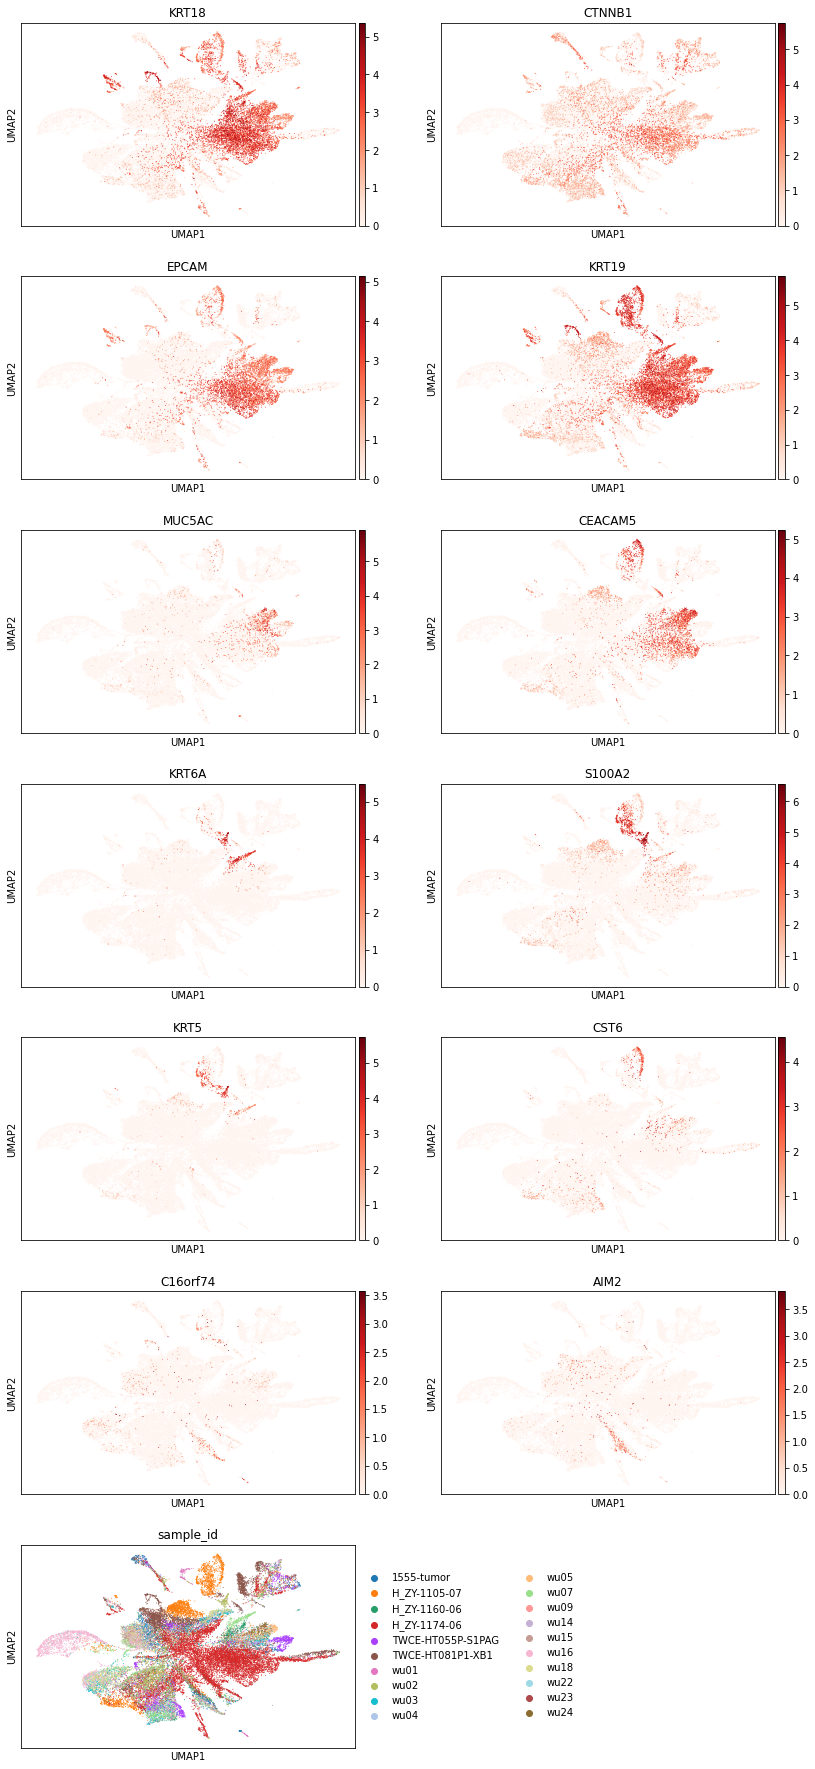

In [130]:
markers = ['KRT18', 'CTNNB1', 'EPCAM', 'KRT19', 'MUC5AC', 'CEACAM5', 'KRT6A', 'S100A2', 'KRT5', 'CST6', 'C16orf74', 'AIM2', 'sample_id']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds')

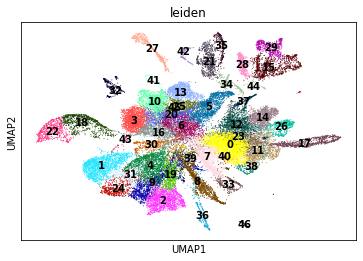

In [103]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [132]:
cell_type_to_cluster['malignant'] = [42, 21, 35, 34, 37, 12, 14, 26, 23, 40, 0, 38, 11, 41, 32]

In [ ]:
# cell_type_to_cluster['malignant_classical'] = [30, 19, 33, 38, 0, 1, 13, 14, 41, 34, 22, 24, 43, 28, 26, 40, 36, 37]
# cell_type_to_cluster['malignant_squamous_like'] = [42, 15, 39]
# cell_type_to_cluster['epithelial'] = [20]

###### plasma

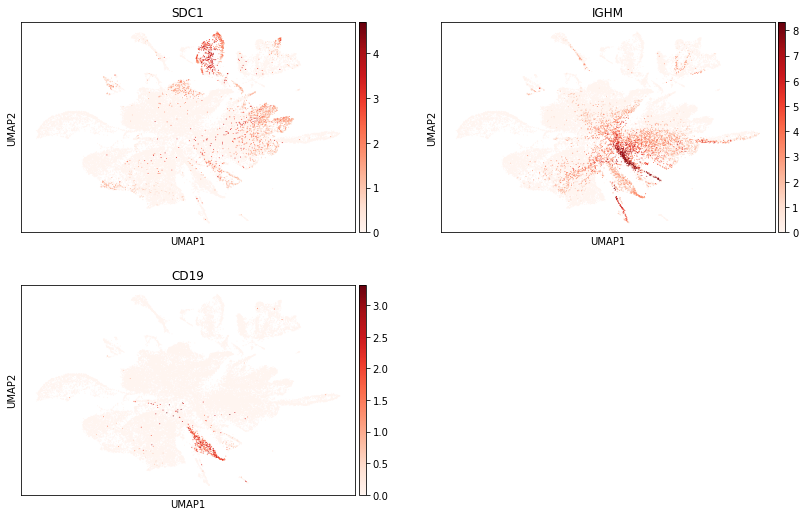

In [105]:
markers = ['SDC1', 'IGHM', 'CD19']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_plasma_surgical.pdf')

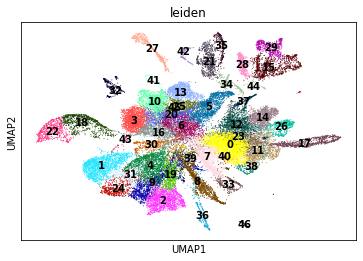

In [106]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [139]:
cell_type_to_cluster['plasma'] = [7, 33, 46]

###### erythrocyte

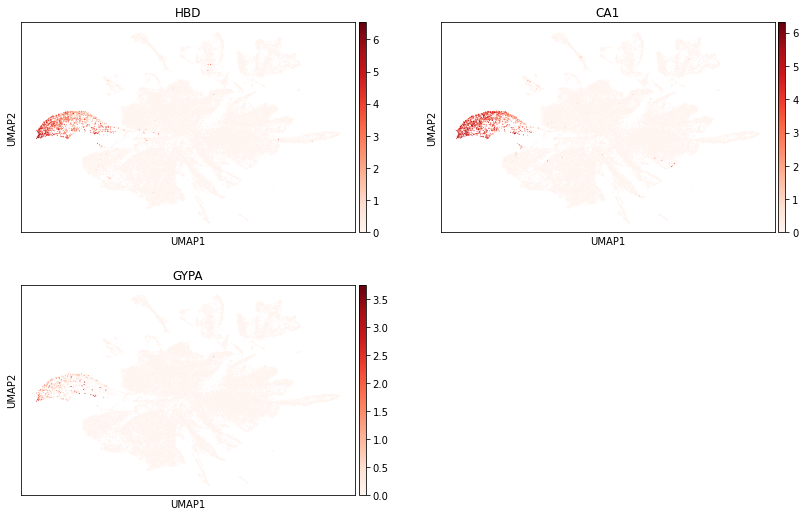

In [107]:
markers = ['HBD', 'CA1', 'GYPA']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds')

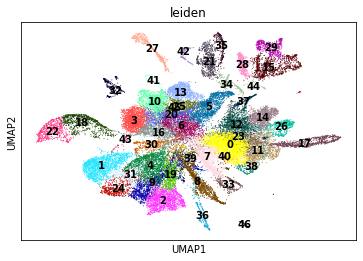

In [108]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [109]:
cell_type_to_cluster['erythrocyte'] = [22, 18]
# cell_type_to_cluster['erythrocyte_2'] = [17]

###### mast

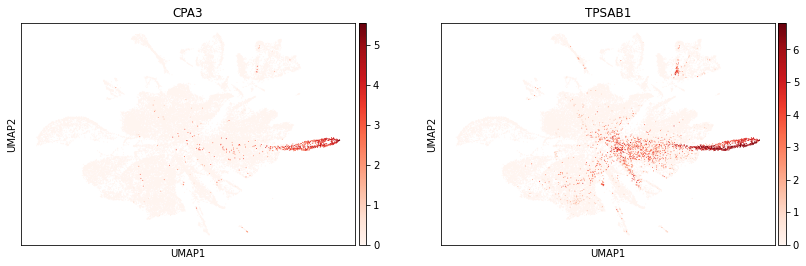

In [110]:
markers = ['CPA3', 'TPSAB1']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds')

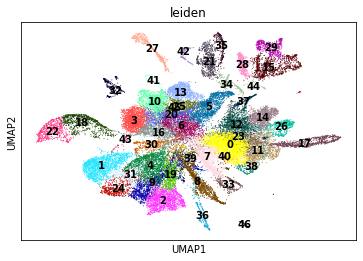

In [111]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [112]:
cell_type_to_cluster['mast'] = [17]

###### endocrine

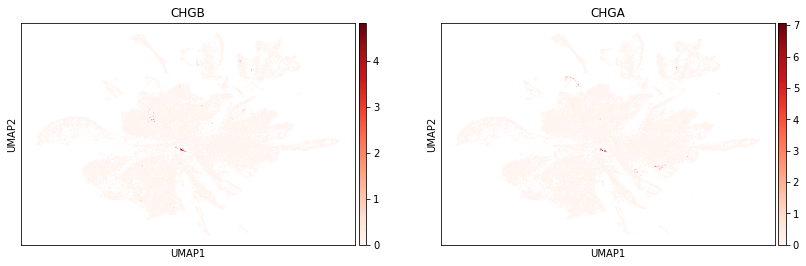

In [113]:
markers = ['CHGB', 'CHGA']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds')

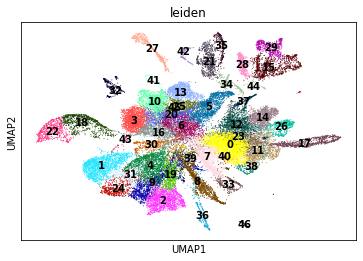

In [114]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
# cell_type_to_cluster['endocrine'] = [30]

###### endothelial

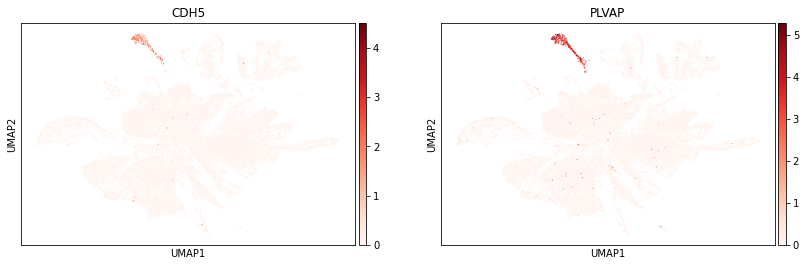

In [115]:
markers = ['CDH5', 'PLVAP']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds')

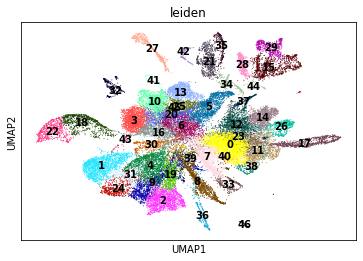

In [116]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [117]:
cell_type_to_cluster['endothelial'] = [27]

###### myocyte

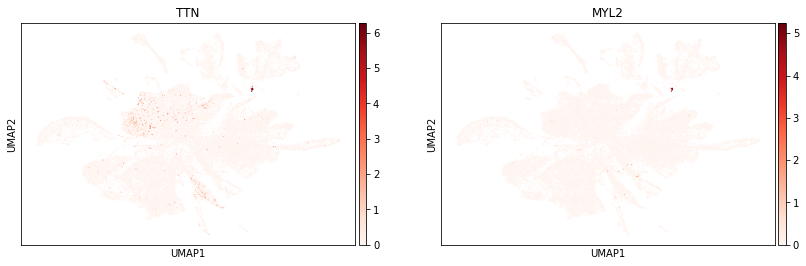

In [118]:
markers = ['TTN', 'MYL2']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [119]:
cell_type_to_cluster['myocyte'] = [44]

###### assign cell types

In [152]:
cluster_to_cell_type = {str(c):ct for ct, cs in cell_type_to_cluster.items()
                       for c in cs}
# sorted(cluster_to_cell_type.keys())

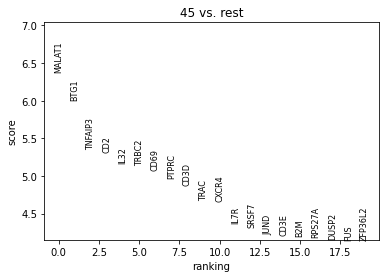

In [153]:
sc.pl.rank_genes_groups(adata, groups=['45'])

In [154]:
adata.obs['cell_type'] = [cluster_to_cell_type.get(c, c) for c in adata.obs['leiden']]

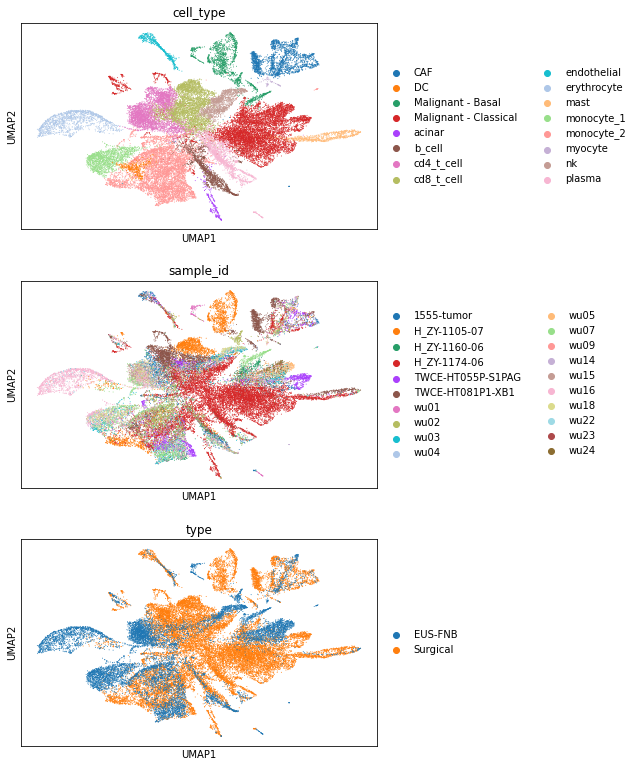

In [257]:
sc.pl.umap(adata, color=['cell_type', 'sample_id', 'type'], ncols=1)

In [216]:
## redo malignant cells
malignant = adata[[True if 'malignant' in c.lower() else False for c in adata.obs['cell_type']]].copy()
malignant

AnnData object with n_obs × n_vars = 8876 × 2999
    obs: 'sample_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'type', 'leiden', 'cell_type'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden',

In [247]:
## recluster
# sc.pp.pca(malignant)
# sc.pp.neighbors(malignant, n_neighbors=15, n_pcs=40)
# sc.tl.umap(malignant)
sc.tl.leiden(malignant, resolution=.5)

In [248]:
bailey_genes = ['CFH', 'CD99', 'HECW1', 'PLXND1', 'RECQL', 'C1orf112', 'M6PR',
               'FKBP4', 'GGCT', 'DBF4', 'SEMA3F', 'ANKIB1', 'MAD1L1', 'CDC27',
               'WDR54', 'DPM1', 'NME2', 'UTP18', 'SLC25A39', 'TTC27']
moffit_genes = ['S100A2', 'KRT6A', 'CST6', 'GPR87', 'SCEL',
                'KRT6C', 'SERPINB4', 'SERPINB3', 'LY6D', 'LY6D', 'PLAG1',
                'IL20RB', 'C16orf74', 'DCBLD2', 'HMGA2', 'SPRR3', 'SPRR1B', 'KRT17']
collison_genes = ['AIM2', 'GPM6B', 'S100A2', 'KRT14', 'CAV1', 'LOX', 'SLC2A3',
                  'TWIST1', 'PAPPA', 'NT5E', 'CKS2', 'HMMR', 'SLC5A3', 'PMAIP1', 'PHLDA1', 'SLC16A1']

In [249]:
a = malignant.raw.copy()
a.X

<8876x19346 sparse matrix of type '<class 'numpy.float32'>'
	with 11708233 stored elements in Compressed Sparse Row format>

In [250]:
import numpy as np
a = malignant.raw[:, bailey_genes]
X = np.sum(a.X.toarray(), axis=1).flatten()
malignant.obs['bailey_score'] = X

a = malignant.raw[:, moffit_genes]
X = np.sum(a.X.toarray(), axis=1).flatten()
malignant.obs['moffit_score'] = X

a = malignant.raw[:, collison_genes]
X = np.sum(a.X.toarray(), axis=1).flatten()
malignant.obs['collison_score'] = X

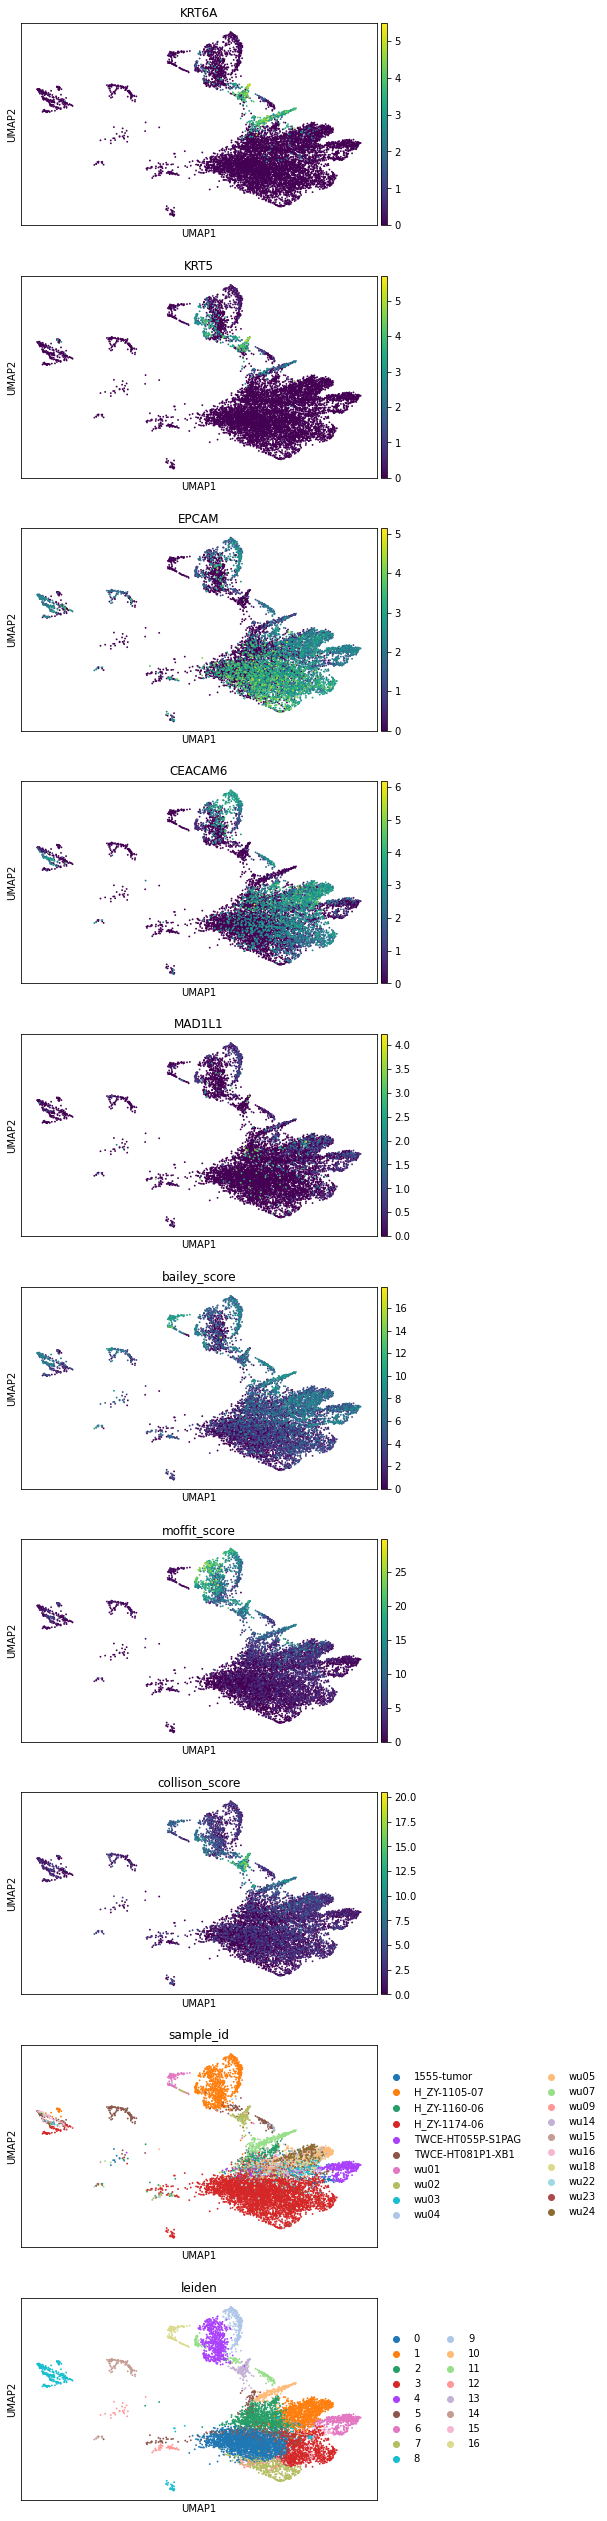

In [251]:
sc.pl.umap(malignant, color=['KRT6A', 'KRT5', 'EPCAM', 'CEACAM6', 'MAD1L1', 'bailey_score', 'moffit_score',
                             'collison_score', 'sample_id', 'leiden'], ncols=1)

... storing 'tumor_type' as categorical


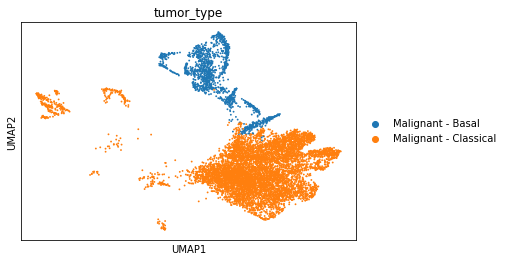

In [252]:
malignant.obs['tumor_type'] = ['Malignant - Basal' if l in ['4', '9', '10', '11', '13', '16'
                                        ] else 'Malignant - Classical' for l in malignant.obs['leiden']]
sc.pl.umap(malignant, color=['tumor_type'])

In [253]:
## recombine
cell_id_to_type = {c:t for c, t in zip(malignant.obs.index, malignant.obs['tumor_type'])}
adata.obs['cell_type'] = [cell_id_to_type[c_id] if 'malignant' in ct.lower() else ct
                          for c_id, ct in zip(adata.obs.index, adata.obs['cell_type'])]

... storing 'cell_type' as categorical


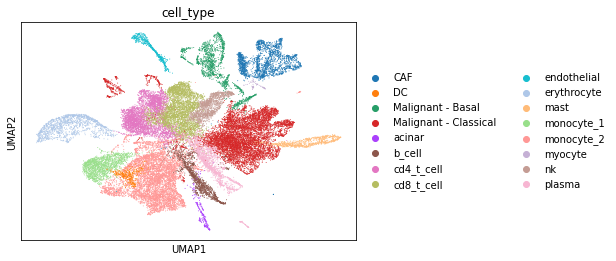

In [254]:
sc.pl.umap(adata, color=['cell_type'])

In [255]:
adata.write_h5ad('../data/pdac/all_processed.h5ad')

In [215]:
adata = sc.read_h5ad('../data/pdac/all_processed.h5ad')
adata

AnnData object with n_obs × n_vars = 33912 × 2999
    obs: 'sample_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'type', 'leiden', 'cell_type'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell_type_colo

## eus fnb

In [ ]:
import numpy as np
samples = {s for s in adata_all.obs['sample_id'] if 'wu' in s}
mask = np.asarray([True if x in samples else False
       for x in adata_all.obs['sample_id']])
adata = adata_all[mask]
adata

In [ ]:
set(adata.obs['sample_id'])

In [ ]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [ ]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]

In [ ]:
adata.write_h5ad('../data/pdac/eus_raw.h5ad')

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [ ]:
sc.pp.log1p(adata)

In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
sc.pl.highly_variable_genes(adata)

In [ ]:
np.count_nonzero(adata.var['highly_variable'])

In [ ]:
adata.raw = adata

In [ ]:
adata = adata[:, adata.var.highly_variable]

In [ ]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [ ]:
sc.pp.scale(adata, max_value=None)

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)


In [ ]:
sc.tl.umap(adata, min_dist=0.5, spread=1.)

In [ ]:

sc.pl.umap(adata, color=['CST3', 'KRT18'], )

In [ ]:
sc.tl.leiden(adata, resolution=1.)

In [ ]:
sc.pl.umap(adata, color=['leiden', 'sample_id'], ncols=1)

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

In [ ]:
cell_type_to_cluster = {}

###### acinar

In [ ]:
markers = ['PRSS1', 'CTRB1']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_acinar.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['acinar'] = [33]

###### fibroblast

In [ ]:
markers = ['SPARC', 'ACTA2', 'IL6', 'PDGFRA', 'CXCL12', 'HLA-DRA']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_caf.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['myCAF'] = [12, 34]
cell_type_to_cluster['iCAF'] = [26, 27]
# cell_type_to_cluster['apCAF'] = [21]

###### monocytes/macrophages

In [ ]:
markers = ['CD14', 'FCGR3A', 'LYZ']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_monocytes.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['monocyte_1'] = [1, 7]
cell_type_to_cluster['monocyte_2'] = [4, 3]

###### B cell

In [ ]:
markers = ['CD19', 'MS4A1']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_bcell.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['b_cell'] = [14, 18, 28]

###### t/nk

In [ ]:
markers = ['CD3G', 'CD4', 'IL7R', 'CD8A', 'GNLY', 'NKG7', 'FOXP3']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_tcell.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['cd4_t_cell'] = [0, 5]
cell_type_to_cluster['cd8_t_cell'] = [9]
cell_type_to_cluster['nk'] = [11]

###### DC

In [ ]:
markers = ['FCER1A', 'CST3', 'LILRA4']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_dc.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['DC'] = [13, 22]

###### ductal

In [ ]:
markers = ['KRT18', 'EPCAM', 'KRT19', 'KRT6A', 'MUC5AC']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_ductal.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['malignant_classical'] = [10, 19, 2, 31, 23, 32]
cell_type_to_cluster['malignant_squamous_like'] = [15]
cell_type_to_cluster['epithelial'] = [20]

###### plasma

In [ ]:
markers = ['SDC1', 'IGHM', 'CD19']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_plasma.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['plasma'] = [24]

###### erythrocyte

In [ ]:
markers = ['HBD', 'CA1', 'GYPA']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_erythrocyte.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['erythrocyte_1'] = [16, 6, 8]
cell_type_to_cluster['erythrocyte_2'] = [17]

###### mast

In [ ]:
markers = ['CPA3', 'TPSAB1']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_mast.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['mast'] = [25]

###### endocrine

In [ ]:
markers = ['CHGB', 'CHGA']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_endocrine.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['endocrine'] = [30]

###### endothelial

In [ ]:
markers = ['CDH5', 'PLVAP']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_endothelial.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['endothelial'] = [21]

###### myocyte

In [ ]:
markers = ['TTN', 'MYL2']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_myocyte.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['myocyte'] = [29]

###### assign cell types

In [ ]:
cluster_to_cell_type = {str(c):ct for ct, cs in cell_type_to_cluster.items()
                       for c in cs}
sorted(cluster_to_cell_type.keys())

In [ ]:
adata.obs['cell_type'] = [cluster_to_cell_type.get(c, c) for c in adata.obs['leiden']]

In [ ]:
sc.pl.umap(adata, color=['cell_type'], ncols=1, save='_cell_types.pdf')

In [ ]:
# sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, groups=['28', '29'])

In [ ]:
# sc.pl.umap(adata, color=['TTN', 'MYL2', 'cell_type'], ncols=1, legend_loc='on data')

In [ ]:
adata.write_h5ad('../data/pdac/merged_processed.h5ad')

###### do cibersortx input

In [208]:
adata = sc.read_h5ad('../data/pdac/merged_processed.h5ad')
adata

AnnData object with n_obs × n_vars = 11030 × 2923
    obs: 'sample_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cell_type'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'cell_type_colors', 'le

In [209]:
counts_adata = sc.read_h5ad('../data/pdac/eus_raw.h5ad')
counts_adata

AnnData object with n_obs × n_vars = 11030 × 19480
    obs: 'sample_id', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids-0', 'feature_types-0', 'gene_ids-1', 'gene_ids-10', 'feature_types-10', 'gene_ids-11', 'feature_types-11', 'gene_ids-12', 'feature_types-12', 'gene_ids-13', 'feature_types-13', 'gene_ids-14', 'feature_types-14', 'gene_ids-15', 'feature_types-15', 'gene_ids-16', 'feature_types-16', 'gene_ids-17', 'feature_types-17', 'gene_ids-18', 'feature_types-18', 'gene_ids-19', 'feature_types-19', 'gene_ids-2', 'gene_ids-20', 'feature_types-20', 'gene_ids-3', 'gene_ids-4', 'gene_ids-5', 'gene_ids-6', 'gene_ids-7', 'feature_types-7', 'gene_ids-8', 'feature_types-8', 'gene_ids-9', 'feature_types-9', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [210]:
counts_df = pd.DataFrame(data=counts_adata.X.toarray().astype(np.int32), columns=counts_adata.var.index,
                        index=counts_adata.obs.index)
counts_df

FAM87B  LINC00115  FAM41C  SAMD11  NOC2L  KLHL17  \
AAACCTGCACCACGTG-1-7        0          0       0       0      0       0   
AAACCTGTCTAACTTC-1-7        0          0       0       0      0       0   
AAACGGGCAAGGCTCC-1-7        0          0       0       0      0       0   
AAACGGGTCATTCACT-1-7        0          0       0       0      0       0   
AAACGGGTCTGTGCAA-1-7        0          0       0       0      0       0   
...                       ...        ...     ...     ...    ...     ...   
TTTCCTCGTACAGTGG-1-20       0          0       0       0      0       0   
TTTCCTCGTGTGACGA-1-20       0          0       0       0      0       0   
TTTGGTTAGAACTGTA-1-20       0          1       0       0      0       0   
TTTGGTTAGATGTGGC-1-20       0          0       0       0      0       0   
TTTGTCAGTTCCACGG-1-20       0          0       0       0      0       0   

                       PLEKHN1  PERM1  HES4  ISG15  ...  AC141272.1  \
AAACCTGCACCACGTG-1-7         0      0     0      0  ...           0   
AAACCTGTCTAACTTC-1-7         0      0     0      0  ...           0   
AAACGGGCAAGGCTCC-1-7         0      0     0      1  ...           0   
AAACGGGTCATTCACT-1-7         0      0     0      0  ...           0   
AAACGGGTCTGTGCAA-1-7         0      0     0      0  ...           0   
...                        ...    ...   ...    ...  ...         ...   
TTTCCTCGTACAGTGG-1-20        0      0     1      3  ...           0   
TTTCCTCGTGTGACGA-1-20        0      0     0      0  ...           0   
TTTGGTTAGAACTGTA-1-20        1      0     2      9  ...           0   
TTTGGTTAGATGTGGC-1-20        0      0     1      0  ...           0   
TTTGTCAGTTCCACGG-1-20        0      0     1      0  ...           0   

                       AC011043.1  AL592183.1  AC007325.4  AC007325.2  \
AAACCTGCACCACGTG-1-7            0           0           0           0   
AAACCTGTCTAACTTC-1-7            0           0           0           0   
AAACGGGCAAGGCTCC-1-7            0           0           0           0   
AAACGGGTCATTCACT-1-7            0           0           0           0   
AAACGGGTCTGTGCAA-1-7            0           0           0           0   
...                           ...         ...         ...         ...   
TTTCCTCGTACAGTGG-1-20           0           0           0           0   
TTTCCTCGTGTGACGA-1-20           0           0           0           0   
TTTGGTTAGAACTGTA-1-20           0           0           0           0   
TTTGGTTAGATGTGGC-1-20           0           0           0           0   
TTTGTCAGTTCCACGG-1-20           0           0           0           0   

                       AL354822.1  AC004556.1  AC233755.2  AC233755.1  \
AAACCTGCACCACGTG-1-7            0           0           0           0   
AAACCTGTCTAACTTC-1-7            0           0           0           0   
AAACGGGCAAGGCTCC-1-7            0           0           0           0   
AAACGGGTCATTCACT-1-7            0           0           0           0   
AAACGGGTCTGTGCAA-1-7            0           0           0           0   
...                           ...         ...         ...         ...   
TTTCCTCGTACAGTGG-1-20           0           0           0           0   
TTTCCTCGTGTGACGA-1-20           0           0           0           0   
TTTGGTTAGAACTGTA-1-20           0           0           0           0   
TTTGGTTAGATGTGGC-1-20           0           0           0           0   
TTTGTCAGTTCCACGG-1-20           0           0           0           0   

                       AC240274.1  
AAACCTGCACCACGTG-1-7            0  
AAACCTGTCTAACTTC-1-7            0  
AAACGGGCAAGGCTCC-1-7            0  
AAACGGGTCATTCACT-1-7            0  
AAACGGGTCTGTGCAA-1-7            0  
...                           ...  
TTTCCTCGTACAGTGG-1-20           0  
TTTCCTCGTGTGACGA-1-20           0  
TTTGGTTAGAACTGTA-1-20           0  
TTTGGTTAGATGTGGC-1-20           0  
TTTGTCAGTTCCACGG-1-20           0  

[11030 rows x 19480 columns]

In [211]:
np.count_nonzero(adata.obs.index==counts_adata.obs.index)

11030

In [212]:
counts_df.index = adata.obs['cell_type']
counts_df = counts_df.transpose()
# counts_df.index.name = 'Gene'
counts_df

cell_type   monocyte_1  malignant_classical  monocyte_2  monocyte_1  \
FAM87B               0                    0           0           0   
LINC00115            0                    0           0           0   
FAM41C               0                    0           0           0   
SAMD11               0                    0           0           0   
NOC2L                0                    0           0           0   
...                ...                  ...         ...         ...   
AL354822.1           0                    0           0           0   
AC004556.1           0                    0           0           0   
AC233755.2           0                    0           0           0   
AC233755.1           0                    0           0           0   
AC240274.1           0                    0           0           0   

cell_type   monocyte_2  myCAF  myCAF  iCAF  mast  monocyte_1  ...  \
FAM87B               0      0      0     0     0           0  ...   
LINC00115            0      0      0     0     0           1  ...   
FAM41C               0      0      0     0     0           0  ...   
SAMD11               0      0      0     0     0           0  ...   
NOC2L                0      0      0     0     0           0  ...   
...                ...    ...    ...   ...   ...         ...  ...   
AL354822.1           0      0      0     0     0           0  ...   
AC004556.1           0      0      0     0     0           0  ...   
AC233755.2           0      0      0     0     0           0  ...   
AC233755.1           0      0      0     0     0           0  ...   
AC240274.1           0      0      0     1     0           0  ...   

cell_type   malignant_classical  malignant_classical  monocyte_2  myCAF  \
FAM87B                        0                    0           0      0   
LINC00115                     0                    0           0      0   
FAM41C                        0                    0           0      0   
SAMD11                        0                    0           0      0   
NOC2L                         0                    0           0      1   
...                         ...                  ...         ...    ...   
AL354822.1                    0                    0           0      0   
AC004556.1                    1                    0           0      0   
AC233755.2                    0                    0           0      0   
AC233755.1                    0                    0           0      0   
AC240274.1                    0                    0           0      1   

cell_type   malignant_classical  malignant_classical  malignant_classical  \
FAM87B                        0                    0                    0   
LINC00115                     0                    0                    0   
FAM41C                        0                    0                    0   
SAMD11                        0                    0                    0   
NOC2L                         0                    0                    0   
...                         ...                  ...                  ...   
AL354822.1                    0                    0                    0   
AC004556.1                    0                    0                    0   
AC233755.2                    0                    0                    0   
AC233755.1                    0                    0                    0   
AC240274.1                    0                    0                    0   

cell_type   malignant_classical  myCAF  malignant_classical  
FAM87B                        0      0                    0  
LINC00115                     1      0                    0  
FAM41C                        0      0                    0  
SAMD11                        0      0                    0  
NOC2L                         0      0                    0  
...                         ...    ...                  ...  
AL354822.1                    0      0                    

In [214]:
counts_df.index.name = 'Gene'
counts_df.groupby('Gene').mean()

cell_type  monocyte_1  malignant_classical  monocyte_2  monocyte_1  \
Gene                                                                 
A1BG                0                    0           0           0   
A1BG-AS1            0                    0           0           0   
A1CF                0                    0           0           0   
A2M                 0                    0           0           0   
A2M-AS1             0                    0           0           0   
...               ...                  ...         ...         ...   
ZXDC                0                    0           0           0   
ZYG11A              0                    0           0           0   
ZYG11B              0                    0           0           0   
ZYX                 0                    0           1           0   
ZZEF1               0                    0           0           0   

cell_type  monocyte_2  myCAF  myCAF  iCAF  mast  monocyte_1  ...  \
Gene                                                         ...   
A1BG                1      0      0     3     1           1  ...   
A1BG-AS1            0      0      0     0     0           0  ...   
A1CF                0      0      0     0     0           0  ...   
A2M                 0      0      0     0     0           0  ...   
A2M-AS1             0      0      0     0     0           0  ...   
...               ...    ...    ...   ...   ...         ...  ...   
ZXDC                0      0      0     0     0           0  ...   
ZYG11A              0      0      0     0     0           0  ...   
ZYG11B              0      0      0     1     0           0  ...   
ZYX                 0      0      2     4     0           6  ...   
ZZEF1               0      0      0     0     0           2  ...   

cell_type  malignant_classical  malignant_classical  monocyte_2  myCAF  \
Gene                                                                     
A1BG                         0                    0           0      0   
A1BG-AS1                     0                    0           0      0   
A1CF                         0                    1           0      0   
A2M                          0                    0           0      1   
A2M-AS1                      0                    0           0      0   
...                        ...                  ...         ...    ...   
ZXDC                         1                    0           1      0   
ZYG11A                       0                    0           0      0   
ZYG11B                       1                    0           0      0   
ZYX                          0                    9           0      0   
ZZEF1                        0                    1           0      0   

cell_type  malignant_classical  malignant_classical  malignant_classical  \
Gene                                                                       
A1BG                         0                    0                    0   
A1BG-AS1                     0                    0                    0   
A1CF                         0                    0                    0   
A2M                          0                    0                    0   
A2M-AS1                      0                    0                    0   
...                        ...                  ...                  ...   
ZXDC                         0                    0                    0   
ZYG11A                       0                    0                    0   
ZYG11B                       0                    0                    0   
ZYX                          1                    0                    0   
ZZEF1                        1                    0                    0   

cell_type  malignant_classical  myCAF  malignant_classical  
Gene                                                        
A1BG                         0      0                    0  
A1BG-AS1                     0      0                    0  
A1CF    

In [213]:
counts_df.index.name = 'Gene'
counts_df.to_csv('../data/cibersortx/sc_ref.txt', sep='\t', header=True, index=True)

In [ ]:
counts_df.index.name = 'Gene'
counts_df

In [ ]:
cytotrace_correlated = ['TMSB10',
 'MYL6',
 'S100A11',
 'PPDPF',
 'COX6A1',
 'B2M',
 'MYL12B',
 'CLIC1',
 'SERF2',
 'HLA-C',
 'COX4I1',
 'CFL1',
 'TMSB4X',
 'COX6B1',
 'COX7A2',
 'SPINT2',
 'ACTB',
 'CHCHD2',
 'CD63',
 'HLA-A',
 'LGALS3',
 'HLA-B',
 'S100A6',
 'GSTP1',
 'PTMA',
 'PPIA',
 'FAU',
 'MYL12A',
 'GNG5',
 'RHOA',
 'H3F3A',
 'RPL15',
 'RPL19',
 'H3F3B',
 'SUMO2',
 'CALM2',
 'TAGLN2',
 'RPS14',
 'SH3BGRL3',
 'COX5B',
 'ARPC3',
 'RPL8',
 'ANXA2',
 'TMBIM6',
 'FTH1',
 'RPS26',
 'RPS27A',
 'PRDX5',
 'SRP14',
 'UBL5',
 'TPT1',
 'ROMO1',
 'EEF1A1',
 'TMEM258',
 'TXN',
 'KRT18',
 'RPL11',
 'RAC1',
 'RPL29',
 'RPS15A',
 'EPCAM',
 'DSTN',
 'EDF1',
 'ACTG1',
 'RPS25',
 'OST4',
 'RPL37',
 'RPL41',
 'RPL39',
 'RPL13',
 'COX6C',
 'HSP90AA1',
 'RPS27',
 'YWHAZ',
 'NDUFB4',
 'RPL24',
 'HSBP1',
 'TSPO',
 'RPLP2',
 'RPS12',
 'RHOC',
 'RPS28',
 'RPL10',
 'RPS13',
 'RPS3',
 'KRT8',
 'RPL7A',
 'IFI27',
 'OAZ1',
 'RPL35A',
 'KRT19',
 'RPS15',
 'COX7C',
 'RPL28',
 'GPX4',
 'COX8A',
 'TMEM59',
 'RPL14',
 'UBA52',
 'TSPAN3']

In [ ]:
squam = ['LGALS1',
 'KRT6A',
 'GAPDH',
 'TPI1',
 'MIF',
 'MT2A',
 'RBX1',
 'VIM',
 'BCAT1',
 'FN1',
 'EMP3',
 'MRPL51',
 'MIA',
 'RNASE1',
 'MRPL52',
 'RBP1',
 'NPC2',
 'TMSB4X',
 'UQCR10',
 'SEC61G',
 'TRBC2',
 'TNNT1',
 'TMSB10',
 'SERPINF1',
 'ROMO1',
 'LCP1',
 'CSTB',
 'LDHB',
 'PFN2',
 'ENO1',
 'COL6A2',
 'S100A16',
 'OST4',
 'S100A13',
 'MIR4435-2HG',
 'PODXL',
 'HMGA2',
 'NEDD8',
 'FTL',
 'C4orf3',
 'STC2',
 'KRT5',
 'RPL26',
 'PGAM1',
 'SLC2A3',
 'ARL4C',
 'COL6A1',
 'PHB2',
 'COL6A3',
 'SLIRP',
 'SRGN',
 'RPL38',
 'STMN1',
 'RPLP0',
 'IGFBP6',
 'RPLP1',
 'ITGAE',
 'S100A4',
 'LSM1',
 'PKM',
 'PSMB6',
 'SNU13',
 'RPS26',
 'STRAP',
 'NDUFA6',
 'WIPF1',
 'IFI27',
 'CALD1',
 'TOMM22',
 'DMKN',
 'TXNDC17',
 'STMN3',
 'YWHAE',
 'NDUFB2',
 'LETM2',
 'FKBP3',
 'PGK1',
 'SERPINE2',
 'AKR1B1',
 'BRK1',
 'TRAPPC1',
 'RPL17',
 'POLR2L',
 'RPL37A',
 'C12orf57',
 'RPL28',
 'TUBA1B',
 'FRMD6',
 'CAV1',
 'RPS12',
 'PMP22',
 'UBE2L3',
 'RPS5',
 'MRPL40',
 'GOLGA7',
 'SPARC',
 'TMEM230',
 'SNX6',
 'C5orf46',
 'NDUFB1']

In [ ]:
# limit to gene
mask = [True if x in adata.var.index or x in cytotrace_correlated or x in squam else False for x in counts_df.index]
filtered = counts_df[mask]
filtered

In [ ]:
filtered.to_csv('../data/cibersortx/sc_ref_small_ed_sq_100.txt', sep='\t', header=True, index=True)

## surgical samples

In [ ]:
samples = {'1555-tumor',
 'H_ZY-1105-07',
 'H_ZY-1160-06',
 'H_ZY-1174-06',
 'TWCE-HT055P-S1PAG',
 'TWCE-HT081P1-XB1'}
mask = np.asarray([True if x in samples else False
       for x in adata_all.obs['sample_id']])
adata = adata_all[mask]
adata

In [ ]:
set(adata.obs['sample_id'])

In [ ]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [ ]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [ ]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [ ]:
adata = adata[adata.obs.n_genes_by_counts < 6000, :]
adata = adata[adata.obs.pct_counts_mt < 10, :]

In [ ]:
sc.pp.normalize_total(adata, target_sum=1e4)

In [ ]:
sc.pp.log1p(adata)

In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

In [ ]:
sc.pl.highly_variable_genes(adata)

In [ ]:
np.count_nonzero(adata.var['highly_variable'])

In [ ]:
adata.raw = adata

In [ ]:
adata = adata[:, adata.var.highly_variable]

In [ ]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [ ]:
sc.pp.scale(adata, max_value=None)

In [ ]:
sc.tl.pca(adata, svd_solver='arpack')

In [ ]:
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=50)

In [ ]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)


In [ ]:
sc.tl.umap(adata, min_dist=0.5, spread=1.)

In [ ]:

sc.pl.umap(adata, color=['CST3', 'KRT18'], )

In [ ]:
sc.tl.leiden(adata, resolution=1.5)

In [ ]:
sc.pl.umap(adata, color=['leiden', 'sample_id'], ncols=1)

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')

In [ ]:
cell_type_to_cluster = {}

###### acinar

In [ ]:
markers = ['PRSS1', 'CTRB1']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_acinar_surgical.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['acinar'] = [35]

###### fibroblast

In [ ]:
markers = ['SPARC', 'ACTA2', 'IL6', 'PDGFRA', 'CXCL12', 'HLA-DRA']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_caf_surgical.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['myCAF'] = [20, 27, 32]
cell_type_to_cluster['iCAF'] = [17]
# cell_type_to_cluster['apCAF'] = [21]

###### monocytes/macrophages

In [ ]:
markers = ['CD14', 'FCGR3A', 'LYZ']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_monocytes_surgical.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['monocyte_1'] = [9]
cell_type_to_cluster['monocyte_2'] = [7,3,6]

###### B cell

In [ ]:
markers = ['CD19', 'MS4A1']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_bcell_surgical.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['b_cell'] = [21, 31]

###### t/nk

In [ ]:
markers = ['CD3G', 'CD4', 'IL7R', 'CD8A', 'GNLY', 'NKG7', 'FOXP3']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_tcell_surgical.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['cd4_t_cell'] = [2, 12, 8]
cell_type_to_cluster['cd8_t_cell'] = [4, 25, 18, 5]
cell_type_to_cluster['nk'] = [10]

###### DC

In [ ]:
markers = ['FCER1A', 'CST3', 'LILRA4']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_dc_surgical.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['DC'] = [11]

###### ductal

In [ ]:
markers = ['KRT18', 'EPCAM', 'KRT19', 'KRT6A', 'MUC5AC', 'sample_id']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_ductal_surgical.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['malignant_classical'] = [30, 19, 33, 38, 0, 1, 13, 14, 41, 34, 22, 24, 43, 28, 26, 40, 36, 37]
cell_type_to_cluster['malignant_squamous_like'] = [42, 15, 39]
# cell_type_to_cluster['epithelial'] = [20]

###### plasma

In [ ]:
markers = ['SDC1', 'IGHM', 'CD19']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_plasma_surgical.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
# cell_type_to_cluster['plasma'] = [24]

###### erythrocyte

In [ ]:
markers = ['HBD', 'CA1', 'GYPA']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_erythrocyte_surgical.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['erythrocyte'] = [33]
# cell_type_to_cluster['erythrocyte_2'] = [17]

###### mast

In [ ]:
markers = ['CPA3', 'TPSAB1']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_mast_surgical.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['mast'] = [29, 16]

###### endocrine

In [ ]:
markers = ['CHGB', 'CHGA']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_endocrine_surgical.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
# cell_type_to_cluster['endocrine'] = [30]

###### endothelial

In [ ]:
markers = ['CDH5', 'PLVAP']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_endothelial_surgical.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['endothelial'] = [23]

###### myocyte

In [ ]:
markers = ['TTN', 'MYL2']
sc.pl.umap(adata, color=markers, ncols=2, color_map='Reds',
          save='_myocyte_surgical.pdf')

In [ ]:
sc.pl.umap(adata, color=['leiden'], ncols=1, legend_loc='on data')

In [ ]:
cell_type_to_cluster['myocyte'] = [29]

###### assign cell types

In [ ]:
cluster_to_cell_type = {str(c):ct for ct, cs in cell_type_to_cluster.items()
                       for c in cs}
sorted(cluster_to_cell_type.keys())

In [ ]:
adata.obs['cell_type'] = [cluster_to_cell_type.get(c, c) for c in adata.obs['leiden']]

In [ ]:
sc.pl.umap(adata, color=['cell_type'], ncols=1, save='_cell_types_surgical.pdf')

In [ ]:
# sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, groups=['28', '29'])

In [ ]:
# sc.pl.umap(adata, color=['TTN', 'MYL2', 'cell_type'], ncols=1, legend_loc='on data')

In [ ]:
adata.write_h5ad('../data/pdac/merged_processed_surgical.h5ad')